# Introduction #

В этом и следующем уроках используются так называемые алгоритмы **обучения без учителя**. Алгоритмы без учителя не используют целевую информацию; вместо этого их целью является изучение некоторых свойств данных, представление структуры объектов определенным образом. В контексте разработки признаков для прогнозирования вы могли бы рассматривать неконтролируемый алгоритм как метод "обнаружения признаков".

**Кластеризация** просто означает распределение точек данных по группам в зависимости от того, насколько они похожи друг на друга. Алгоритм кластеризации позволяет, так сказать, "сходиться во мнениях".

При использовании для разработки функций мы могли бы попытаться выявить группы клиентов, представляющих, например, сегмент рынка, или географические районы с похожими погодными условиями. Добавление функции кластерных меток может помочь моделям машинного обучения распутать сложные пространственные или соседние отношения.

# Cluster Labels as a Feature #

Примененная к одному объекту с вещественным значением, кластеризация действует подобно традиционному "объединению" или ["discretization"](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html) преобразованию. При использовании нескольких функций это похоже на "многомерное объединение". (sometimes called *vector quantization*).

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/sr3pdYI.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> Кластеризация одного объекта. <strong>Right:</strong> Кластеризация по двум объектам.
</center></figcaption>
</figure>

Добавленная во фрейм данных функция меток кластеров может выглядеть следующим образом:

| Longitude | Latitude | Cluster |
|-----------|----------|---------|
| -93.619   | 42.054   | 3       |
| -93.619   | 42.053   | 3       |
| -93.638   | 42.060   | 1       |
| -93.602   | 41.988   | 0       |

Важно помнить, что `Cluster` признак является категориальным. Здесь он показан в виде кодировки меток (то есть в виде последовательности целых чисел), которую выдает типичный алгоритм кластеризации; в зависимости от вашей модели, более подходящим может быть однократное кодирование.

Идея добавления меток кластеров заключается в том, что кластеры будут разбивать сложные взаимосвязи между объектами на более простые фрагменты. Тогда наша модель сможет просто изучать более простые фрагменты один за другим, вместо того чтобы изучать сложное целое сразу. Это стратегия "разделяй и властвуй".

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/rraXFed.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Функция кластеризации по годам выпуска помогает этой линейной модели определить ее связь с ценой продажи (SalePrice).
</center></figcaption>
</figure>

На рисунке показано, как кластеризация может улучшить простую линейную модель. Кривая взаимосвязь между `YearBuilt` и `SalePrice` это слишком сложно для такого рода моделей -- это *underfits*. Однако на более мелких фрагментах взаимосвязь такова *almost* линейный, и что модель может быть легко изучена.

# k-Means Clustering #
Существует великое множество алгоритмов кластеризации. Они различаются главным образом тем, как они измеряют "сходство" или "близость" и с какими типами объектов они работают. Алгоритм, который мы будем использовать, k-means, интуитивно понятен и прост в применении в контексте разработки объектов. В зависимости от вашего приложения другой алгоритм может оказаться более подходящим.

**K-means clustering** измеряет сходство, используя обычное расстояние по прямой (другими словами, евклидово расстояние). Кластеры создаются путем размещения нескольких точек, называемых **centroids**, внутри пространственного объекта. Каждая точка в наборе данных назначается кластеру, к которому она ближе всего расположена. "k" в "k-означает" - это количество центроидов (то есть кластеров), которые она создает. Вы сами определяете k.

Вы можете представить, что каждый центроид фиксирует точки в последовательности расходящихся окружностей. Когда наборы окружностей от конкурирующих центроидов перекрываются, они образуют линию. В результате получается так называемая **Voronoi tessallation**. Тесселяция показывает, к каким кластерам будут отнесены будущие данные; тесселяция - это, по сути, то, что k-means извлекает из своих обучающих данных.

Кластеризация на [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) набор данных, приведенный выше, представляет собой кластеризацию с использованием k-средних значений. Здесь показан тот же рисунок с тесселяцией и центроидами.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/KSoLd3o.jpg" width=450, alt="">
<figcaption style="textalign: center; font-style: italic"><center>K-means clustering creates a Voronoi tessallation of the feature space.
</center></figcaption>
</figure>

Давайте рассмотрим, как алгоритм k-means распознает кластеры и что это означает для разработки функций. Мы сосредоточимся на трех параметрах реализации scikit-learn: `n_clusters`, `max_iter`, and `n_init`.

Это простой двухэтапный процесс. Алгоритм начинается с случайной инициализации некоторого предопределенного числа(`n_clusters`) центроидов. Затем он повторяет эти две операции:
1. назначьте точки ближайшему центроиду кластера
2. переместите каждый центр тяжести, чтобы свести к минимуму расстояние до его точек

Он повторяет эти два шага до тех пор, пока центроиды больше не перестанут двигаться или пока не пройдет некоторое максимальное количество итераций (`max_iter`).

Часто случается, что начальное случайное положение центроидов приводит к плохой кластеризации. По этой причине алгоритм повторяется несколько раз (`n_init`) и возвращает кластеризацию, которая имеет наименьшее общее расстояние между каждой точкой и ее центроидом, то есть оптимальную кластеризацию.

На анимации ниже показан алгоритм в действии. Она иллюстрирует зависимость результата от начальных центроидов и важность итераций до достижения сходимости.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/tBkCqXJ.gif" width=550, alt="">
<figcaption style="textalign: center; font-style: italic"><center>The K-means clustering algorithm on Airbnb rentals in NYC.
</center></figcaption>
</figure>

Возможно, вам потребуется увеличить `max_iter` для большого количества кластеров или `n_init` для сложного набора данных. Однако обычно единственным параметром, который вам нужно выбрать самостоятельно, является `n_clusters` (k, that is). Наилучшее разделение для набора функций зависит от используемой вами модели и того, что вы пытаетесь предсказать, поэтому лучше всего настроить его, как любой гиперпараметр (скажем, путем перекрестной проверки).

# Example - California Housing #

Как пространственные объекты, [*California Housing*](https://www.kaggle.com/camnugent/california-housing-prices)'s `'Latitude'` and `'Longitude'` создайте естественных кандидатов для кластеризации с использованием k-средних значений. В этом примере мы сгруппируем их с помощью `'MedInc'` (средний доход) для создания экономических сегментов в разных регионах Калифорнии.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Поскольку кластеризация с использованием k-средних значений чувствительна к масштабированию, может быть хорошей идеей масштабировать или нормализовать данные с экстремальными значениями. Наши функции уже имеют примерно одинаковый масштаб, поэтому мы оставим их как есть.

In [2]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,5
1,8.3014,37.86,-122.22,5
2,7.2574,37.85,-122.24,5
3,5.6431,37.85,-122.25,5
4,3.8462,37.85,-122.25,0


Теперь давайте посмотрим на пару графиков, чтобы понять, насколько это было эффективно. Сначала приведем точечную диаграмму, которая показывает географическое распределение кластеров. Похоже, что алгоритм создал отдельные сегменты для районов с более высоким уровнем дохода на побережье.

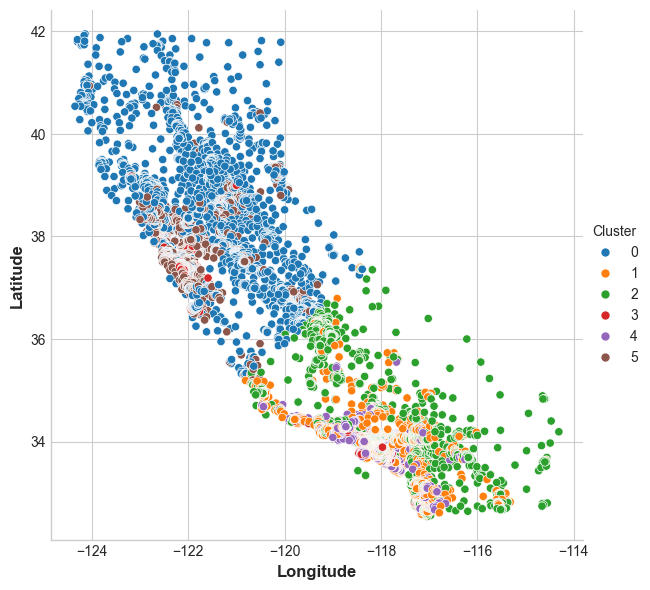

In [3]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

Целью в этом наборе данных является `MedHouseVal` (медианная стоимость дома). Эти прямоугольные диаграммы показывают распределение целевого объекта в пределах каждого кластера. Если кластеризация является информативной, эти распределения должны, по большей части, быть разделены по `MedHouseVal`, это действительно то, что мы видим.

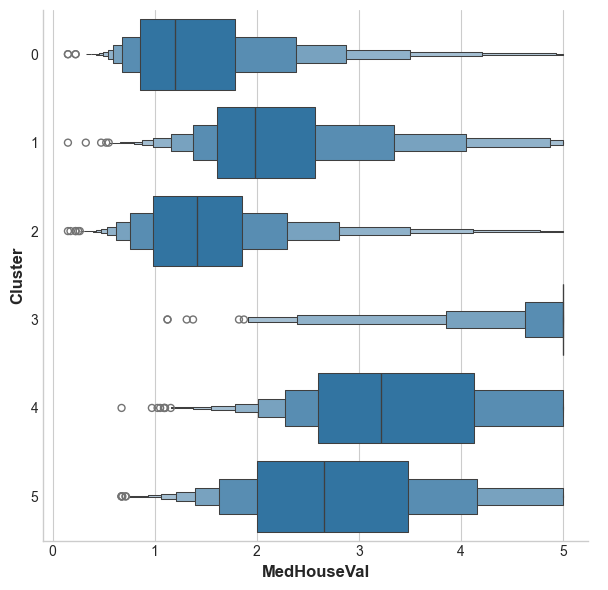

In [4]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);